In [35]:
import pandas as pd 
import matplotlib.pyplot as plt

In [36]:
def loadData(path, nrows=None):
    return pd.read_csv(path, nrows=nrows)

In [37]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataLondonUTD19 = loadData(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19.csv", nrows=10000000)

In [38]:
dataframeLondonUTD19 = pd.DataFrame(dataLondonUTD19)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [39]:
# Drop the error column, because it is not needed
dataframeLondonUTD19 = dataframeLondonUTD19.drop(["error"], axis=1)
dataframeLondonUTD19 = dataframeLondonUTD19.drop(["speed"], axis=1)
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london


In [40]:
# Make a new column with the day of the week
dataframeLondonUTD19['day'] = pd.to_datetime(dataframeLondonUTD19['day'])
dataframeLondonUTD19['weekday'] = dataframeLondonUTD19['day'].dt.day_name()
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday


In [41]:
dataframeLondonUTD19 = clip_outliers(dataframeLondonUTD19,column = 'occ', group_by_detid=False, outliner_factor=1.5)
dataframeLondonUTD19 = clip_outliers(dataframeLondonUTD19,column = 'flow', group_by_detid=False, outliner_factor=2.5)

In [42]:
#Calculate the speed using the formula speed = flow / occupancy
dataframeLondonUTD19['traffic'] = dataframeLondonUTD19['flow'] * dataframeLondonUTD19['occ']
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


In [43]:
#Filter the data for the EAST_N04/161x1 detector
#to test the traffic calculation
dataframeEAST_N04 = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'EAST_N04/161x1']
dataframeEAST_N04.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


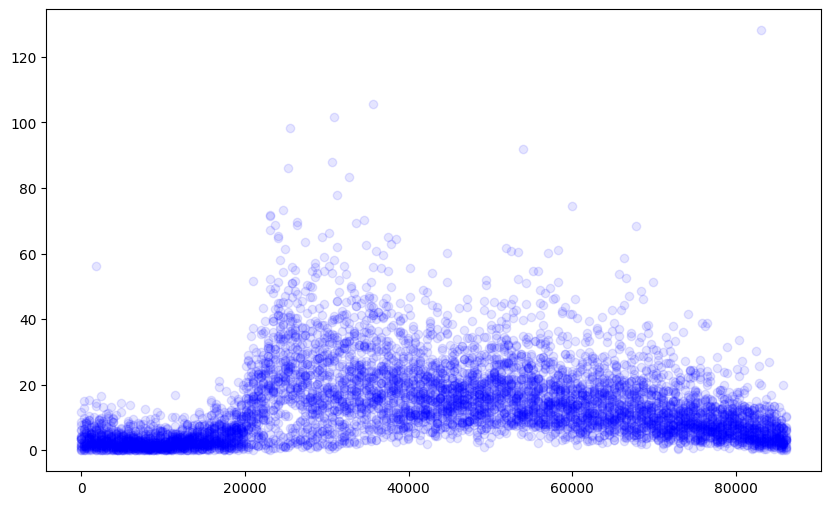

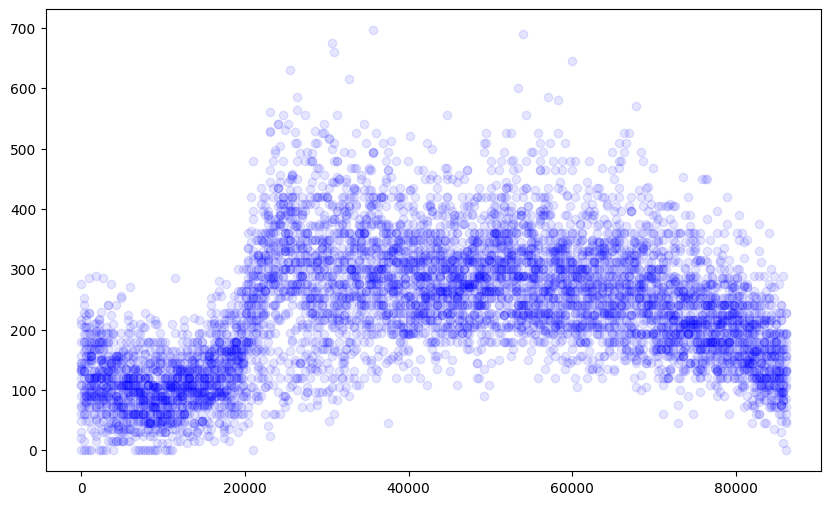

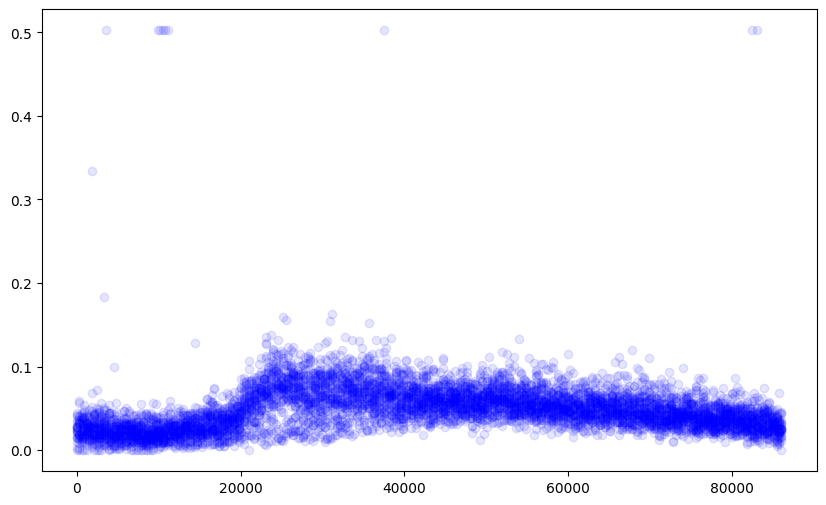

In [44]:
#Plot the speed of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()
#Plot the flow of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['flow'], alpha=0.1, color='blue')
plt.show()
#Plot the occupancy of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['occ'], alpha=0.1, color='blue')
plt.show()

In [45]:
dataframeEAST_N04Saturday = dataframeEAST_N04[dataframeEAST_N04['weekday'] == 'Saturday']
dataframeEAST_N04Saturday.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


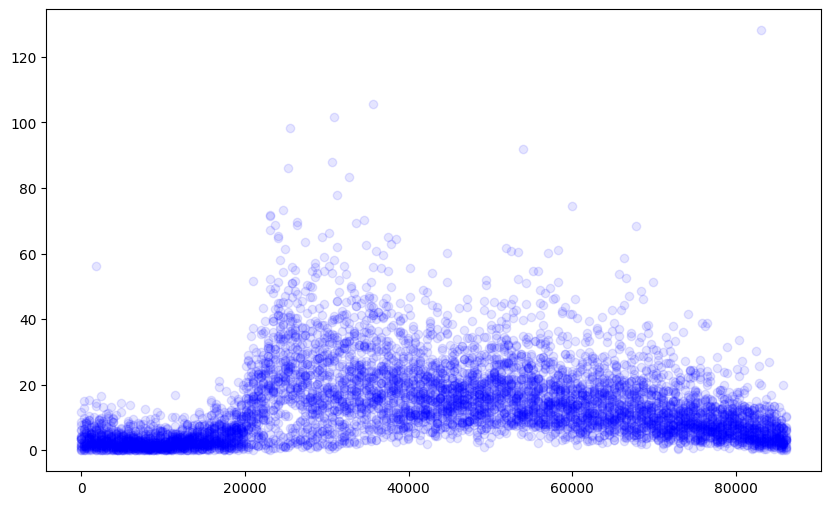

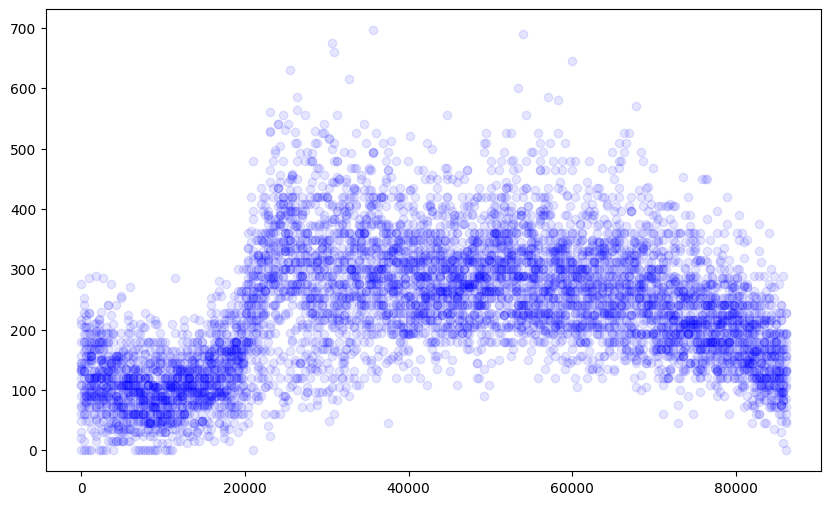

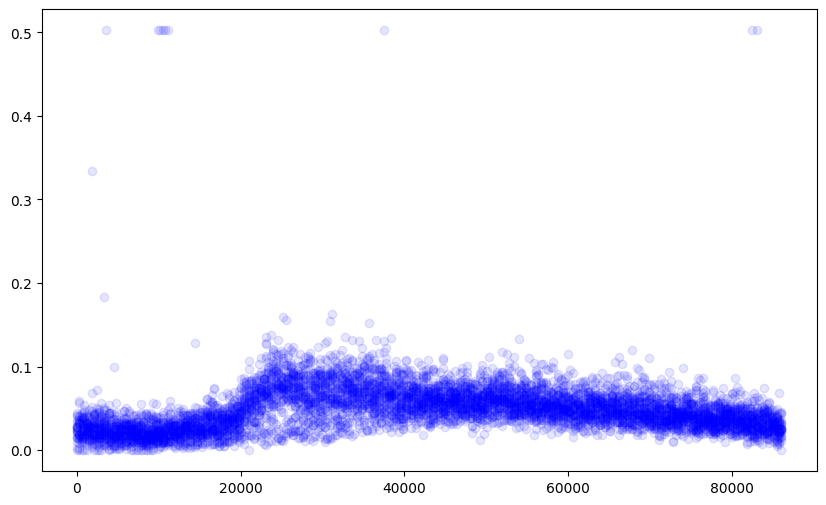

In [46]:
#Plot the speed of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()
#Plot the flow of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['flow'], alpha=0.1, color='blue')
plt.show()
#Plot the occupancy of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['occ'], alpha=0.1, color='blue')
plt.show()

In [47]:
#Clip functions to remove outliers for every detector
def clip_outliers(df,column, group_by_detid=False, outliner_factor=1.5):
    def clip(group):
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - outliner_factor * IQR
        upper_bound = Q3 + outliner_factor * IQR
        group[column] = group[column].clip(lower=lower_bound, upper=upper_bound)
        return group

    if group_by_detid:
        df = df.groupby('detid').apply(clip)
    else:
        df = clip(df)
    
    return df

In [48]:
#Detect anomalies for every detector
def detect_anomalies(df):
    df = df.groupby('detid')['traffic'].mean().reset_index()
    Q1 = df['traffic'].quantile(0.25)
    Q3 = df['traffic'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Identify anomalies
    anomalies = df[(df['traffic'] < lower_bound) | (df['traffic'] > upper_bound)]
    
    # Return unique detid values where anomalies are detected
    return anomalies['detid'].unique()

In [49]:
# Filter the DataFrame to clip outliers
# Clip means setting the values outside the bounds to the bounds
# This is done to make the data more readable
dataframeLondonUTD19 = clip_outliers(dataframeLondonUTD19,column='traffic', group_by_detid=True)

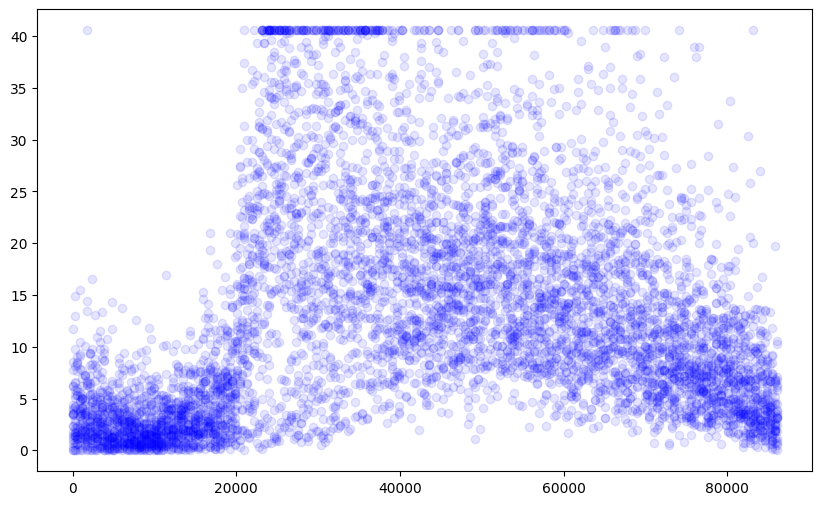

In [50]:
#plot for one detector
dataframeEAST_N04 = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'EAST_N04/161x1']
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()

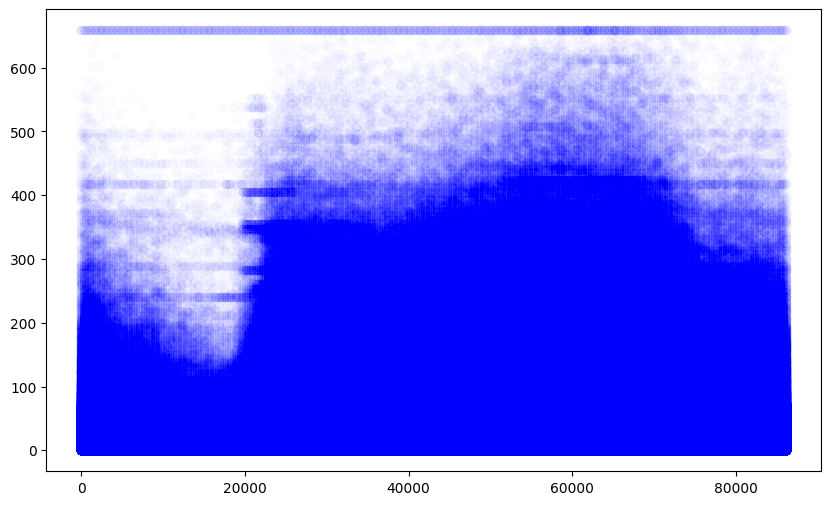

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(dataframeLondonUTD19['interval'], dataframeLondonUTD19['traffic'], alpha=0.01, color='blue')
plt.show()

Different value for every detector issue

In [52]:
dataLondonDetectors = loadData(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_detectors.csv")
dataframeLondonDetectors = pd.DataFrame(dataLondonDetectors)
dataframeLondonDetectors.head()

,detid,length,pos,fclass,road,limit,citycode,lanes,linkid,long,lat
0,EAST_N04/161x1,0.303585,0.261157,secondary,Homerton Road,NaN,london,1.0,5082.0,-0.021497,51.550929
1,EAST_N04/161y1,0.103679,0.063417,primary,Eastway,NaN,london,1.0,5091.0,-0.020899,51.550704
2,EAST_N04/162a1,0.260623,0.117906,secondary,Homerton Road,NaN,london,1.0,5083.0,-0.022649,51.550907
3,EAST_N04/162a2,0.216874,0.117942,secondary,Homerton Road,NaN,london,1.0,5084.0,-0.022617,51.550880
4,EAST_N04/163f1,0.344754,0.329789,primary,Eastway,NaN,london,1.0,5092.0,-0.019288,51.552281


In [53]:
# Merge the DataFrames on 'detid' and include only the 'lanes' column from dataframeLondonDetectors
if 'detid' in dataframeLondonUTD19.index.names:
    dataframeLondonUTD19 = dataframeLondonUTD19.reset_index(drop=True)

if 'detid' in dataframeLondonDetectors.index.names:
    dataframeLondonDetectors = dataframeLondonDetectors.reset_index(drop=True)

dataframeLondonUTD19 = dataframeLondonUTD19.merge(dataframeLondonDetectors[['detid', 'lanes']], on='detid', how='left')
dataframeLondonUTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic,lanes
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday,92.400000,1.0
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday,54.519992,1.0
2,2015-05-16,600,CNTR_N00/005x1,468.0,0.068333,london,Saturday,31.980000,1.0
3,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday,84.999999,1.0
4,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday,95.040000,1.0


In [54]:
dataframeLondonUTD19['traffic'] = dataframeLondonUTD19['traffic'] / dataframeLondonUTD19['lanes']
dataframeLondonUTD19[['traffic']].describe()

,traffic
count,1.000000e+07
mean,3.492849e+01
std,6.279931e+01
min,0.000000e+00
25%,2.343750e-01
50%,7.536440e+00
75%,4.062500e+01
max,6.586849e+02


In [55]:
anomalous_detids = detect_anomalies(dataframeLondonUTD19)
dataframeLondonUTD19 = dataframeLondonUTD19[~dataframeLondonUTD19['detid'].isin(anomalous_detids)]
anomalous_detids.size

19

In [56]:
#Check for Outliners in the whole traffic data, not just for one detector
dataframeLondonUTD19 = clip_outliers(dataframeLondonUTD19,column = 'traffic', group_by_detid=False, outliner_factor=2.5)
dataframeLondonUTD19[['traffic']].describe()

,traffic
count,9.877508e+06
mean,2.802683e+01
std,4.072491e+01
min,0.000000e+00
25%,2.100000e-01
50%,7.200000e+00
75%,3.888000e+01
max,1.355550e+02


In [57]:
# Map the traffic values to a range between 0 and 99
min_traffic = dataframeLondonUTD19['traffic'].min()
max_traffic = dataframeLondonUTD19['traffic'].max()

dataframeLondonUTD19.loc[:,'traffic'] = ((dataframeLondonUTD19['traffic'] - min_traffic) / (max_traffic - min_traffic)) * 99

# Convert the scaled values to integers
dataframeLondonUTD19.loc[:,'traffic'] = dataframeLondonUTD19['traffic'].fillna(0).astype(int)

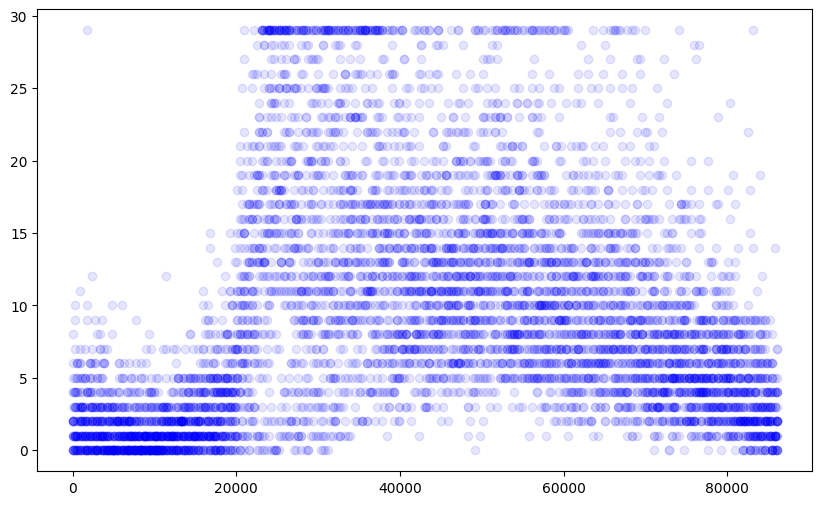

In [58]:
#plot for one detector
dataframeEAST_N04 = dataframeLondonUTD19[dataframeLondonUTD19['detid'] == 'EAST_N04/161x1']
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()

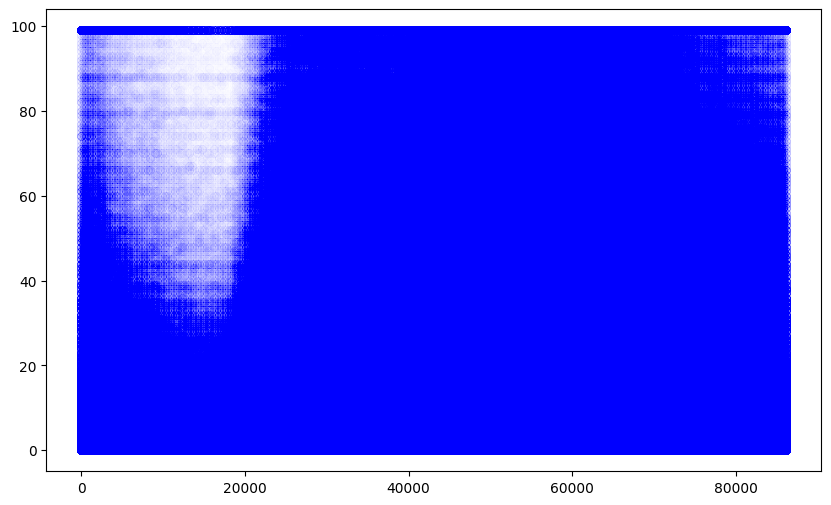

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(dataframeLondonUTD19['interval'], dataframeLondonUTD19['traffic'], alpha=0.005, color='blue')
plt.show()